In [1]:
from generator_based_on_Seattle import *

In [2]:
from parameters import *

In [3]:
generated_traffic_combined = generate_traffic_based_on_seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    constant_bitrate=IS_CONSTANT_BITRATE, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [4]:
generated_traffic_combined

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
81189,727.123130,6,0,100,727.123130,727.238180
81190,727.130494,11,1,100,727.130494,730.091652
81191,727.151864,5,11,100,727.151864,727.504814
81192,727.162125,6,1,100,727.162125,727.579362


In [5]:
generated_traffic = divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)

In [6]:
generated_traffic[0]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
8765,89.932200,8,7,100,89.932200,90.256452
8766,89.941644,8,12,100,89.941644,90.218275
8767,89.954877,3,8,100,89.954877,91.034156
8768,89.961373,0,13,100,89.961373,90.225677


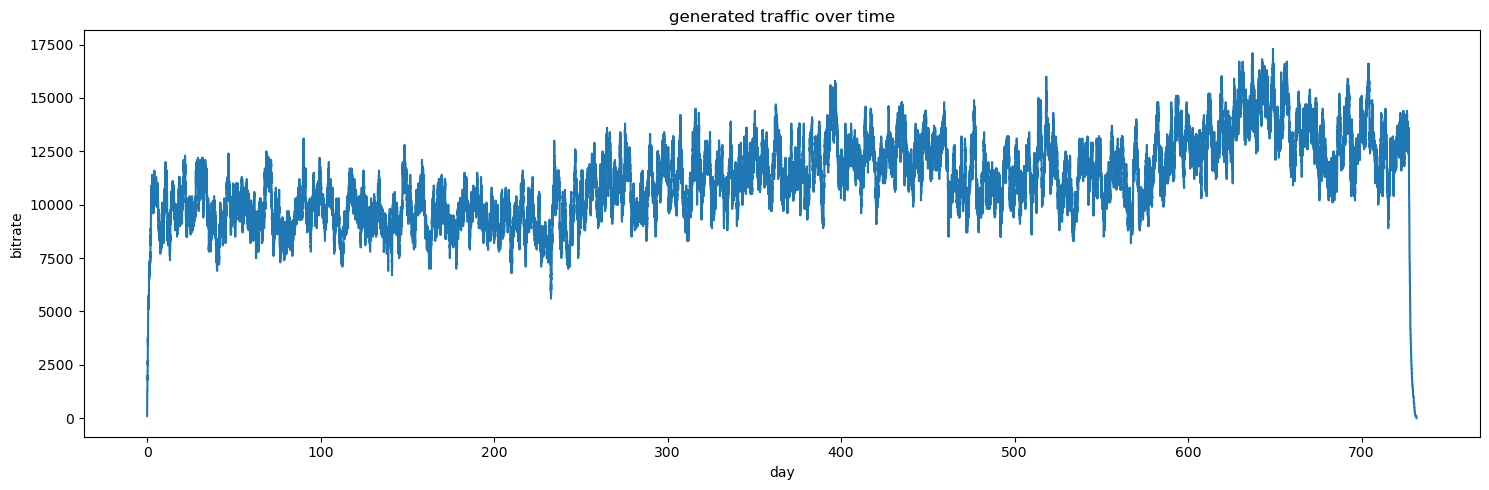

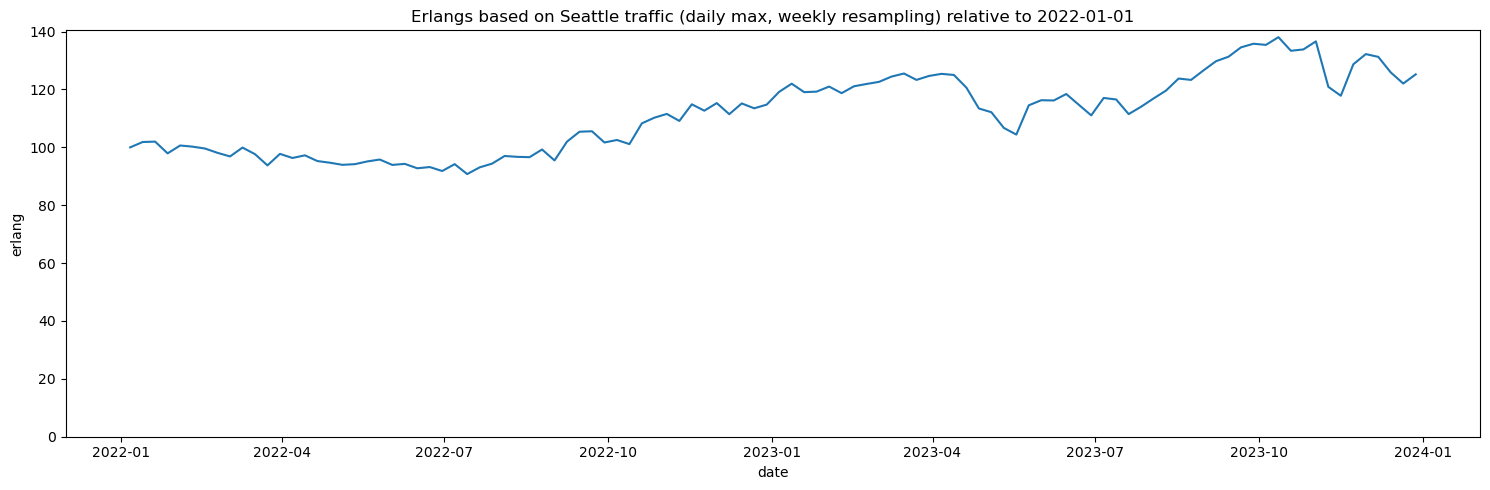

In [7]:
draw_generated_traffic(generated_traffic_combined)
draw_erlangs_from_Seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [8]:
predicted_traffic = perdict_traffic(generated_traffic_combined, constant_bitrate=IS_CONSTANT_BITRATE, period_length=UPGRADE_PERIOD, alpha=ALPHA_PERCENT)

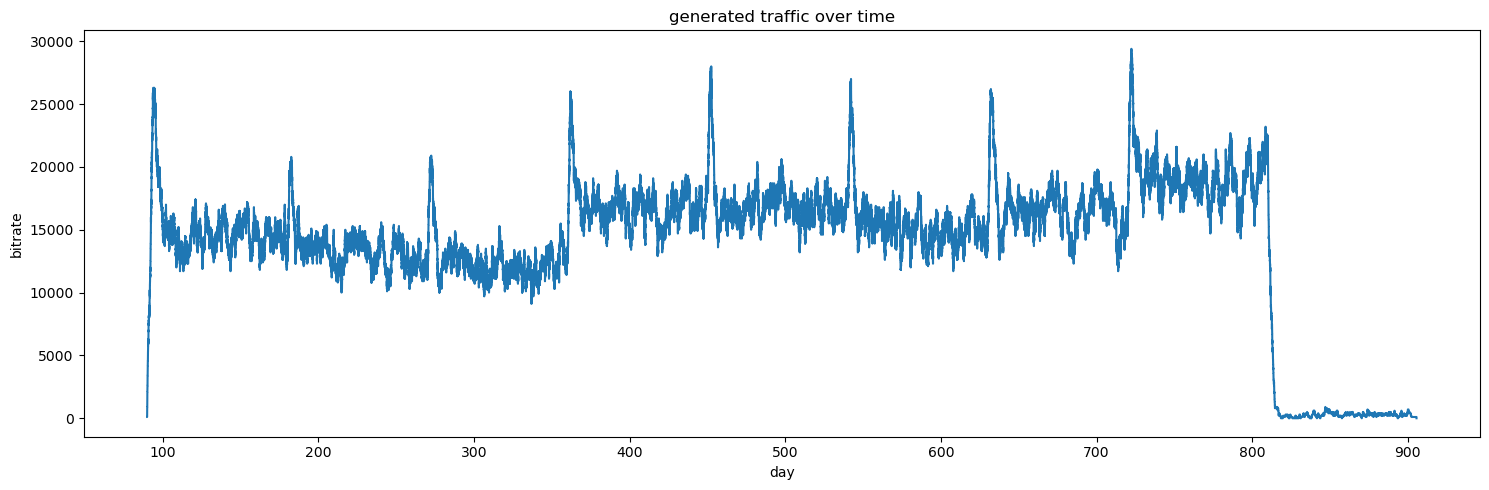

In [9]:
draw_generated_traffic(pd.concat(predicted_traffic))

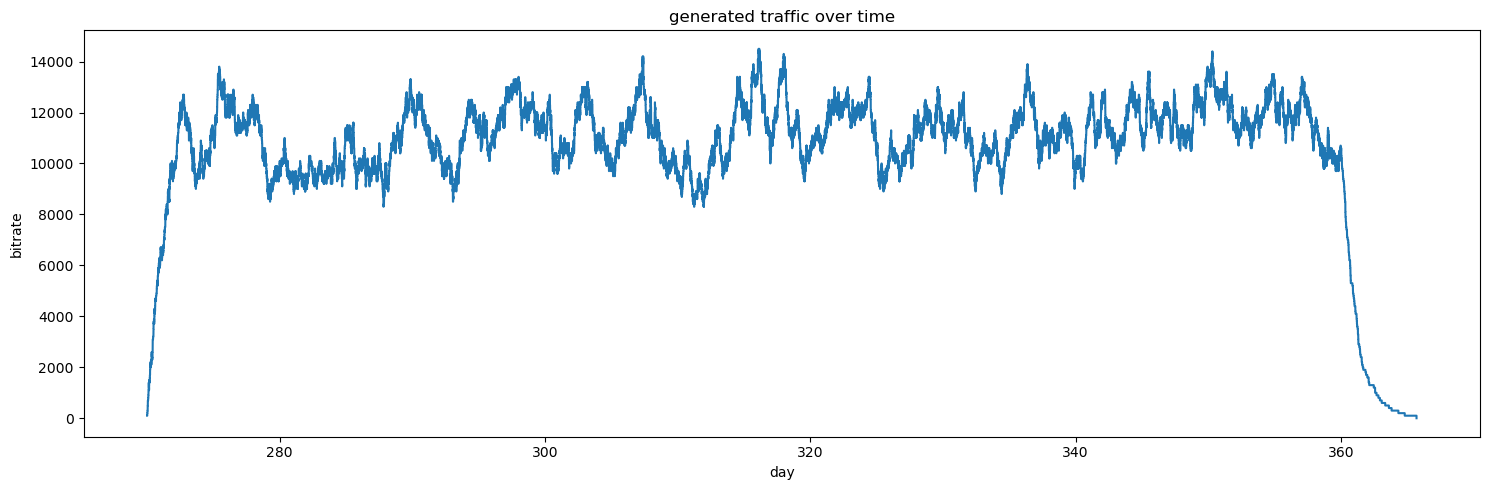

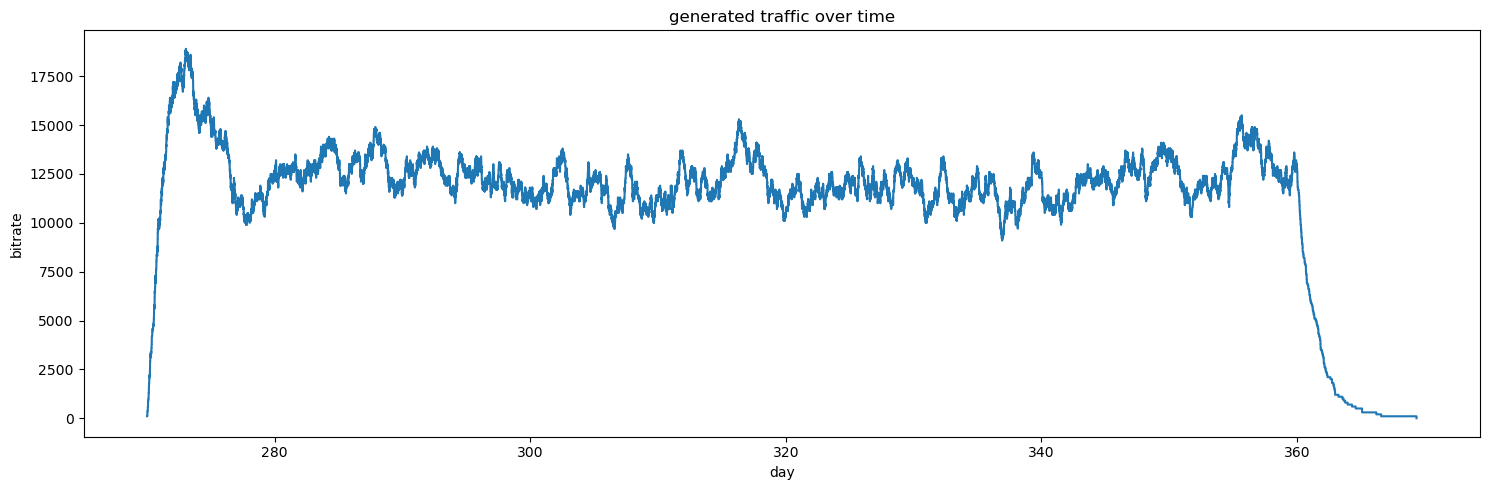

In [10]:
draw_generated_traffic(divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)[3])
draw_generated_traffic(predicted_traffic[2])

In [11]:
type(generated_traffic)

list

In [12]:
type(generated_traffic[0])

pandas.core.frame.DataFrame

In [13]:
len(generated_traffic)

9

In [14]:
type(predicted_traffic)

list

In [15]:
type(predicted_traffic[0])

pandas.core.frame.DataFrame

In [16]:
len(predicted_traffic)

9

In [17]:
generated_traffic[-1]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
80256,720.000547,7,5,100,720.000547,721.547124
80257,720.001255,12,4,100,720.001255,721.740233
80258,720.010639,9,2,100,720.010639,720.124334
80259,720.011398,1,10,100,720.011398,720.205204
80260,720.023014,10,12,100,720.023014,720.442547
...,...,...,...,...,...,...
81189,727.123130,6,0,100,727.123130,727.238180
81190,727.130494,11,1,100,727.130494,730.091652
81191,727.151864,5,11,100,727.151864,727.504814
81192,727.162125,6,1,100,727.162125,727.579362


In [18]:
predicted_traffic[0].iloc[len(predicted_traffic)]

current_global_time     90.101689
source_id               10.000000
destination_id          13.000000
datarate               100.000000
arrival_time            90.101689
departure_time          90.610771
Name: 9, dtype: float64

In [19]:
from pathlib import Path

parent_folder: str = 'generated_traffic_data'
load_folder_path: str = parent_folder + '/' + 'load' + '_' + str(LAMBDA_0)
actual_traffic_folder_path: str = load_folder_path + '/' + 'actual_traffic'
predicted_traffic_folder_path: str = load_folder_path + '/' + 'predicted_traffic'
predicted_traffic_alphafolder_path: str = load_folder_path + '/' + 'predicted_traffic' + '/' + 'alpha' + str(ALPHA_PERCENT)

# Do not create patent folder 'generated_traffic_data' again
Path(load_folder_path).mkdir(parents=True, exist_ok=True)
Path(actual_traffic_folder_path).mkdir(parents=True, exist_ok=True)
Path(predicted_traffic_folder_path).mkdir(parents=True, exist_ok=True)
Path(predicted_traffic_alphafolder_path).mkdir(parents=True, exist_ok=True)

In [20]:
generated_traffic

[      current_global_time  source_id  destination_id  datarate  arrival_time  \
 0                0.000000          9               4       100      0.000000   
 1                0.009420         12               0       100      0.009420   
 2                0.027667         13               6       100      0.027667   
 3                0.028379          2               4       100      0.028379   
 4                0.031656          9              10       100      0.031656   
 ...                   ...        ...             ...       ...           ...   
 8765            89.932200          8               7       100     89.932200   
 8766            89.941644          8              12       100     89.941644   
 8767            89.954877          3               8       100     89.954877   
 8768            89.961373          0              13       100     89.961373   
 8769            89.978748          2              12       100     89.978748   
 
       departure_time  
 0

In [21]:
# Save generated Traffic
for index, traffic_dataframe in enumerate(generated_traffic):
    #specify path for export
    filepath: str = actual_traffic_folder_path + '/' + 'actual_traffic' + '_' + str(UPGRADE_PERIOD * index) + '_' + str(UPGRADE_PERIOD * (index + 1)) + '.txt'

    #export DataFrame to text file
    with open(filepath, 'a') as f:
        df_string = traffic_dataframe.to_string(header=False, index=True)
        f.write(df_string)

In [22]:
# Save predicted Traffic
for index, traffic_dataframe in enumerate(predicted_traffic):
    #specify path for export
    filepath: str = predicted_traffic_alphafolder_path + '/' + 'predicted_traffic' + '_' + str(UPGRADE_PERIOD * (index + 1)) + '_' + str(UPGRADE_PERIOD * (index + 2)) + '.txt'

    #export DataFrame to text file
    with open(filepath, 'a') as f:
        df_string = traffic_dataframe.to_string(header=False, index=True)
        f.write(df_string)